In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Reading Datset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/AIML_IITG/Datasets/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


# Checking missing values and informatio about dataset

In [4]:
df.isnull().sum()

,0
Med_1_mL,0
Med_2_mL,0
Virus Present,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [6]:
df.describe()

,Med_1_mL,Med_2_mL,Virus Present
count,400.000000,400.000000,400.000000
mean,5.447984,5.616750,0.500000
std,2.319059,2.336637,0.500626
min,1.000000,1.000000,0.000000
25%,3.249062,3.431311,0.000000
50%,5.393776,5.638471,0.500000
75%,7.630389,7.782614,1.000000
max,10.000000,10.000000,1.000000


# Visualize the dataset

<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

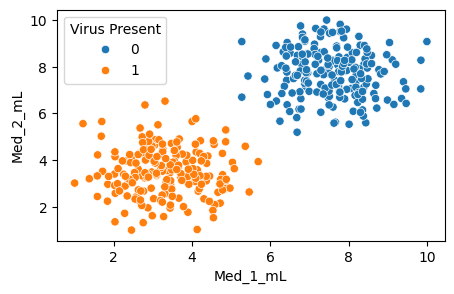

In [7]:
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'Med_1_mL',y = 'Med_2_mL',hue = 'Virus Present',data = df)

# Extracting target and feature variables

In [8]:
X = df.drop("Virus Present",axis=1)
y = df["Virus Present"]

# Splitting dataset for training and testing

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=0.3)

# Defining the hyper parameters for pipeline

In [10]:
sc = StandardScaler()
svm = SVC()

In [13]:
pipe = Pipeline([('sc',sc),('svm',svm)])
pipe

Pipeline(steps=[('sc', StandardScaler()), ('svm', SVC())])

In [15]:
parameters = {'svm__kernel':["linear",'rbf'],
              'svm__C':[0.01,0.1,0.5,1],
              'svm__gamma':['auto','scale']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,param_grid=parameters,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.01, 0.1, 0.5, 1],
                         'svm__gamma': ['auto', 'scale'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [16]:
grid.best_params_

{'svm__C': 0.01, 'svm__gamma': 'auto', 'svm__kernel': 'linear'}

In [19]:
scores = grid.cv_results_['mean_test_score']

# Final Model with best parameters

In [22]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [23]:
svm_best = SVC(kernel='linear',gamma='auto',C=0.01)
svm_best.fit(x_train_scaled,y_train)
svm_best

SVC(C=0.01, gamma='auto', kernel='linear')

In [24]:
y_pred = svm_best.predict(x_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

# Model Evaluation

In [27]:
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")

Accuracy score: 1.0


In [28]:
conf = confusion_matrix(y_test,y_pred)

In [29]:
conf

array([[60,  0],
       [ 0, 60]])

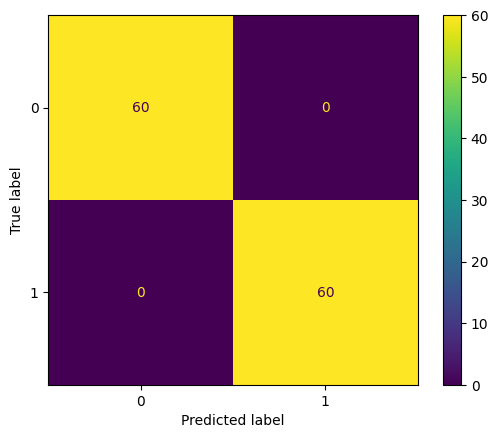

In [30]:
ConfusionMatrixDisplay(conf).plot()

In [31]:
print("Classification report: ")
print(classification_report(y_test,y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# Saving the model

In [33]:
from joblib import dump
dump(svm_best,'/content/drive/MyDrive/AIML_IITG/SVM/best_model_mouse_viral.joblib')

['/content/drive/MyDrive/AIML_IITG/SVM/best_model_mouse_viral.joblib']